In [1]:
import pandas as pd
import numpy as np
import os
    
import missingno as msno
import statsmodels.api as sm
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns
sns.set()
import folium
import math
import warnings

import plotly.express as px

from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta
import datetime as dt
from matplotlib import pyplot as plt
from scipy.stats import uniform
from textwrap import wrap
from math import sqrt


import scipy.cluster.hierarchy as shc


from sklearn.base import TransformerMixin, BaseEstimator, clone
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering

from sklearn.compose import ColumnTransformer
from sklearn.datasets import make_regression, make_blobs
from sklearn.decomposition import PCA

from sklearn.dummy import DummyRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, ExtraTreesRegressor, RandomForestClassifier
from sklearn.experimental import enable_iterative_imputer
from sklearn.feature_extraction import FeatureHasher
from sklearn.feature_selection import RFE
from sklearn.impute import SimpleImputer, IterativeImputer, KNNImputer
from sklearn.linear_model import ElasticNet, LinearRegression, LogisticRegression, Ridge, Lasso, LassoCV, RidgeCV
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score,  median_absolute_error, mean_absolute_error, silhouette_score
from sklearn.metrics import adjusted_rand_score as ARI

from sklearn import model_selection
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, GridSearchCV, RandomizedSearchCV, KFold
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline, FeatureUnion, make_pipeline
from sklearn.preprocessing import StandardScaler, LabelBinarizer, OneHotEncoder, LabelEncoder,  MinMaxScaler, normalize
from sklearn.svm import SVR, LinearSVR
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.svm import SVC
from sklearn import dummy, preprocessing, utils
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

import plotly.graph_objects as go
from plotly.subplots import make_subplots


from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer, InterclusterDistance

import xgboost as xg
import shap

from datetime import datetime, timedelta

### RECUPERATION DU DATAFRAME COMPLET

In [2]:
df = pd.read_csv("dfprojet5.csv").rename(columns = {'order_purchase_timestamp' : 'date'})


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115609 entries, 0 to 115608
Data columns (total 40 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       115609 non-null  object 
 1   customer_id                    115609 non-null  object 
 2   order_status                   115609 non-null  object 
 3   date                           115609 non-null  object 
 4   order_approved_at              115595 non-null  object 
 5   order_delivered_carrier_date   114414 non-null  object 
 6   order_delivered_customer_date  113209 non-null  object 
 7   order_estimated_delivery_date  115609 non-null  object 
 8   review_id                      115609 non-null  object 
 9   review_score                   115609 non-null  int64  
 10  review_comment_title           13801 non-null   object 
 11  review_comment_message         48906 non-null   object 
 12  review_creation_date          

In [4]:
df['order_id'].duplicated().sum()

19093

In [5]:
df = df.drop_duplicates(subset=["order_id"])
df

,order_id,customer_id,order_status,date,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,...,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,a54f0611adc9ed256b57ede6b6eb5114,4,...,268.0,4.0,500.0,19.0,8.0,13.0,9350,maua,SP,housewares
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28 00:00:00,b46f1e34512b0f4c74a72398b03ca788,4,...,268.0,4.0,500.0,19.0,8.0,13.0,9350,maua,SP,housewares
4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15 00:00:00,dc90f19c2806f1abba9e72ad3c350073,5,...,268.0,4.0,500.0,19.0,8.0,13.0,9350,maua,SP,housewares
5,bfc39df4f36c3693ff3b63fcbea9e90a,53904ddbea91e1e92b2b3f1d09a7af86,delivered,2017-10-23 23:26:46,2017-10-25 02:14:11,2017-10-27 16:48:46,2017-11-07 18:04:59,2017-11-13 00:00:00,1bafb430e498b939f258b9c9dbdff9b1,3,...,268.0,4.0,500.0,19.0,8.0,13.0,9350,maua,SP,housewares
6,5f49f31e537f8f1a496454b48edbe34d,a7260a6ccba78544ccfaf43f920b7240,delivered,2017-08-24 11:31:28,2017-08-24 11:45:25,2017-08-25 14:17:55,2017-08-28 20:12:20,2017-09-14 00:00:00,8899ca945efd951c97107b4966289227,1,...,189.0,3.0,775.0,16.0,16.0,13.0,9350,maua,SP,housewares
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115602,4cbf1cc60a2d1704a70e11ee8be1510a,406c8e1382162dc6bef214e0c01fc297,delivered,2018-01-01 17:03:13,2018-01-01 17:11:48,2018-01-02 15:58:13,2018-01-10 13:45:30,2018-01-30 00:00:00,d2ab760b550d788a438048f6fca52aef,5,...,554.0,1.0,1750.0,95.0,9.0,37.0,89701,concordia,SC,la_cuisine
115603,fbd9022ebf9271e1952ca884a972d1bd,3e46b833c6f5d7827700b8ef99db2e08,delivered,2017-07-22 17:55:13,2017-07-22 18:10:09,2017-07-24 18:28:01,2017-07-27 19:03:29,2017-08-11 00:00:00,ac24486e719028c654916b3aa2419a50,5,...,554.0,1.0,1750.0,95.0,9.0,37.0,89701,concordia,SC,la_cuisine
115604,30b0ea32347476f4b427daf62e09a5bb,9d9cfbce48737214f23bf294daf3c6f7,delivered,2017-08-12 19:20:39,2017-08-12 19:30:17,2017-08-14 18:26:28,2017-08-17 18:28:10,2017-09-05 00:00:00,fdbbec4b750e768ac12c054acd906d1d,5,...,232.0,1.0,7600.0,55.0,15.0,55.0,89701,concordia,SC,la_cuisine
115605,1ce0acf125f1bcd636276dd213363196,d11524bb77c28efad04e4467eac8a660,delivered,2017-07-31 18:10:29,2017-07-31 18:25:20,2017-08-02 18:22:30,2017-08-09 20:38:07,2017-08-28 00:00:00,4dc7a70acb9d9eeeb1db4e74f88b2e9b,5,...,429.0,1.0,2700.0,85.0,7.0,40.0,89701,concordia,SC,la_cuisine


In [6]:
### PREPARATION DU RFM

In [7]:
df['Recence'] = df.groupby('customer_unique_id')['date'].transform('max')
NOW = dt.datetime(2018,9,3)

df['date'] = pd.to_datetime(df['date'])
df['Recence']= NOW - df[
    'date']
df['Recence'] = df['Recence'].dt.days
df['Frequence'] =df.groupby('customer_unique_id')['order_id'].transform('count')
df['Montant'] = df.groupby('customer_unique_id')['payment_value'].transform('sum')


df

,order_id,customer_id,order_status,date,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,...,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english,Recence,Frequence,Montant
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,a54f0611adc9ed256b57ede6b6eb5114,4,...,19.0,8.0,13.0,9350,maua,SP,housewares,335,2,62.23
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28 00:00:00,b46f1e34512b0f4c74a72398b03ca788,4,...,19.0,8.0,13.0,9350,maua,SP,housewares,383,1,37.77
4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15 00:00:00,dc90f19c2806f1abba9e72ad3c350073,5,...,19.0,8.0,13.0,9350,maua,SP,housewares,396,1,37.77
5,bfc39df4f36c3693ff3b63fcbea9e90a,53904ddbea91e1e92b2b3f1d09a7af86,delivered,2017-10-23 23:26:46,2017-10-25 02:14:11,2017-10-27 16:48:46,2017-11-07 18:04:59,2017-11-13 00:00:00,1bafb430e498b939f258b9c9dbdff9b1,3,...,19.0,8.0,13.0,9350,maua,SP,housewares,314,1,44.09
6,5f49f31e537f8f1a496454b48edbe34d,a7260a6ccba78544ccfaf43f920b7240,delivered,2017-08-24 11:31:28,2017-08-24 11:45:25,2017-08-25 14:17:55,2017-08-28 20:12:20,2017-09-14 00:00:00,8899ca945efd951c97107b4966289227,1,...,16.0,16.0,13.0,9350,maua,SP,housewares,374,2,467.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115602,4cbf1cc60a2d1704a70e11ee8be1510a,406c8e1382162dc6bef214e0c01fc297,delivered,2018-01-01 17:03:13,2018-01-01 17:11:48,2018-01-02 15:58:13,2018-01-10 13:45:30,2018-01-30 00:00:00,d2ab760b550d788a438048f6fca52aef,5,...,95.0,9.0,37.0,89701,concordia,SC,la_cuisine,244,1,130.03
115603,fbd9022ebf9271e1952ca884a972d1bd,3e46b833c6f5d7827700b8ef99db2e08,delivered,2017-07-22 17:55:13,2017-07-22 18:10:09,2017-07-24 18:28:01,2017-07-27 19:03:29,2017-08-11 00:00:00,ac24486e719028c654916b3aa2419a50,5,...,95.0,9.0,37.0,89701,concordia,SC,la_cuisine,407,2,154.70
115604,30b0ea32347476f4b427daf62e09a5bb,9d9cfbce48737214f23bf294daf3c6f7,delivered,2017-08-12 19:20:39,2017-08-12 19:30:17,2017-08-14 18:26:28,2017-08-17 18:28:10,2017-09-05 00:00:00,fdbbec4b750e768ac12c054acd906d1d,5,...,55.0,15.0,55.0,89701,concordia,SC,la_cuisine,386,1,213.06
115605,1ce0acf125f1bcd636276dd213363196,d11524bb77c28efad04e4467eac8a660,delivered,2017-07-31 18:10:29,2017-07-31 18:25:20,2017-08-02 18:22:30,2017-08-09 20:38:07,2017-08-28 00:00:00,4dc7a70acb9d9eeeb1db4e74f88b2e9b,5,...,85.0,7.0,40.0,89701,concordia,SC,la_cuisine,398,1,55.18


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96516 entries, 0 to 115607
Data columns (total 43 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96516 non-null  object        
 1   customer_id                    96516 non-null  object        
 2   order_status                   96516 non-null  object        
 3   date                           96516 non-null  datetime64[ns]
 4   order_approved_at              96503 non-null  object        
 5   order_delivered_carrier_date   95557 non-null  object        
 6   order_delivered_customer_date  94486 non-null  object        
 7   order_estimated_delivery_date  96516 non-null  object        
 8   review_id                      96516 non-null  object        
 9   review_score                   96516 non-null  int64         
 10  review_comment_title           11392 non-null  object        
 11  review_comment

In [9]:
dfRFM = df[['Recence','Frequence','Montant']]
X = dfRFM
std_scale = StandardScaler().fit(X)
X_std =  std_scale.transform(X)

In [10]:
dfRFM

,Recence,Frequence,Montant
0,335,2,62.23
3,383,1,37.77
4,396,1,37.77
5,314,1,44.09
6,374,2,467.00
...,...,...,...
115602,244,1,130.03
115603,407,2,154.70
115604,386,1,213.06
115605,398,1,55.18


In [11]:
### UTILISATION DU MEILLEUR MODELE POUR LES KMEANS

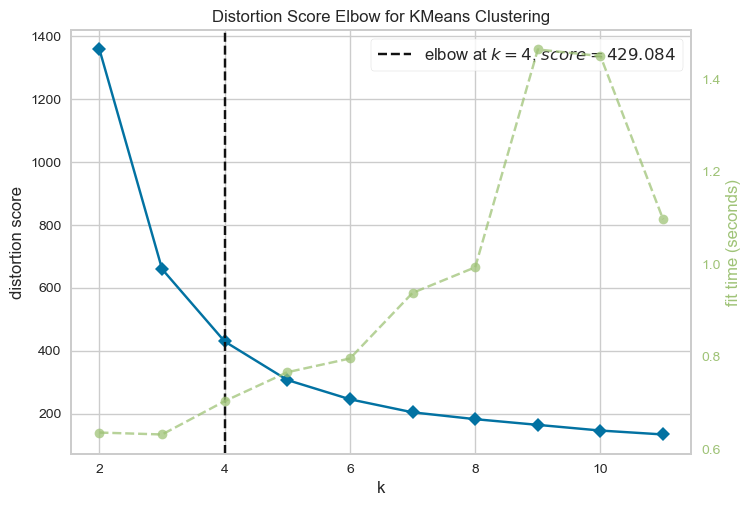

In [12]:
# PCA Pipeline
kmeans_visualizer = Pipeline([("preprocessor", MinMaxScaler()),
                ("kelbowvisualizer", KElbowVisualizer(KMeans(n_init=10),k=(2,12)))])
kmeans_visualizer.fit(X)
kmeans_visualizer.named_steps['kelbowvisualizer'].show()
bestK = kmeans_visualizer.named_steps['kelbowvisualizer'].elbow_value_


In [13]:
kmeans_model = Pipeline([("preprocessor", MinMaxScaler()),
                             ("kmeans", KMeans(bestK))])
kmeans_model.fit(X)

# Kmeans labels
df['kmeans_labels'] = kmeans_model.named_steps['kmeans'].labels_

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


In [14]:
df['kmeans_labels'].nunique()

4

In [15]:
### PREPARATION DE LA MODELISATION

In [16]:
df['date'].max()

Timestamp('2018-09-03 09:06:57')

In [17]:
df['date'].min()

Timestamp('2016-09-04 21:15:19')

In [18]:
df

,order_id,customer_id,order_status,date,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,...,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english,Recence,Frequence,Montant,kmeans_labels
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,a54f0611adc9ed256b57ede6b6eb5114,4,...,8.0,13.0,9350,maua,SP,housewares,335,2,62.23,0
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28 00:00:00,b46f1e34512b0f4c74a72398b03ca788,4,...,8.0,13.0,9350,maua,SP,housewares,383,1,37.77,0
4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15 00:00:00,dc90f19c2806f1abba9e72ad3c350073,5,...,8.0,13.0,9350,maua,SP,housewares,396,1,37.77,0
5,bfc39df4f36c3693ff3b63fcbea9e90a,53904ddbea91e1e92b2b3f1d09a7af86,delivered,2017-10-23 23:26:46,2017-10-25 02:14:11,2017-10-27 16:48:46,2017-11-07 18:04:59,2017-11-13 00:00:00,1bafb430e498b939f258b9c9dbdff9b1,3,...,8.0,13.0,9350,maua,SP,housewares,314,1,44.09,0
6,5f49f31e537f8f1a496454b48edbe34d,a7260a6ccba78544ccfaf43f920b7240,delivered,2017-08-24 11:31:28,2017-08-24 11:45:25,2017-08-25 14:17:55,2017-08-28 20:12:20,2017-09-14 00:00:00,8899ca945efd951c97107b4966289227,1,...,16.0,13.0,9350,maua,SP,housewares,374,2,467.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115602,4cbf1cc60a2d1704a70e11ee8be1510a,406c8e1382162dc6bef214e0c01fc297,delivered,2018-01-01 17:03:13,2018-01-01 17:11:48,2018-01-02 15:58:13,2018-01-10 13:45:30,2018-01-30 00:00:00,d2ab760b550d788a438048f6fca52aef,5,...,9.0,37.0,89701,concordia,SC,la_cuisine,244,1,130.03,3
115603,fbd9022ebf9271e1952ca884a972d1bd,3e46b833c6f5d7827700b8ef99db2e08,delivered,2017-07-22 17:55:13,2017-07-22 18:10:09,2017-07-24 18:28:01,2017-07-27 19:03:29,2017-08-11 00:00:00,ac24486e719028c654916b3aa2419a50,5,...,9.0,37.0,89701,concordia,SC,la_cuisine,407,2,154.70,2
115604,30b0ea32347476f4b427daf62e09a5bb,9d9cfbce48737214f23bf294daf3c6f7,delivered,2017-08-12 19:20:39,2017-08-12 19:30:17,2017-08-14 18:26:28,2017-08-17 18:28:10,2017-09-05 00:00:00,fdbbec4b750e768ac12c054acd906d1d,5,...,15.0,55.0,89701,concordia,SC,la_cuisine,386,1,213.06,0
115605,1ce0acf125f1bcd636276dd213363196,d11524bb77c28efad04e4467eac8a660,delivered,2017-07-31 18:10:29,2017-07-31 18:25:20,2017-08-02 18:22:30,2017-08-09 20:38:07,2017-08-28 00:00:00,4dc7a70acb9d9eeeb1db4e74f88b2e9b,5,...,7.0,40.0,89701,concordia,SC,la_cuisine,398,1,55.18,0


In [19]:
data=  df[['customer_unique_id','date' ,'Recence','Frequence','Montant','payment_value', 'order_id','kmeans_labels']]

In [20]:
### BOUCLE DANS BOUCLE

In [21]:
data1=data
data1

,customer_unique_id,date,Recence,Frequence,Montant,payment_value,order_id,kmeans_labels
0,7c396fd4830fd04220f754e42b4e5bff,2017-10-02 10:56:33,335,2,62.23,18.12,e481f51cbdc54678b7cc49136f2d6af7,0
3,3a51803cc0d012c3b5dc8b7528cb05f7,2017-08-15 18:29:31,383,1,37.77,37.77,128e10d95713541c87cd1a2e48201934,0
4,ef0996a1a279c26e7ecbd737be23d235,2017-08-02 18:24:47,396,1,37.77,37.77,0e7e841ddf8f8f2de2bad69267ecfbcf,0
5,e781fdcc107d13d865fc7698711cc572,2017-10-23 23:26:46,314,1,44.09,44.09,bfc39df4f36c3693ff3b63fcbea9e90a,0
6,7a1de9bde89aedca8c5fbad489c5571c,2017-08-24 11:31:28,374,2,467.00,127.45,5f49f31e537f8f1a496454b48edbe34d,0
...,...,...,...,...,...,...,...,...
115602,9b8844d7cceb1277e6508cce966e4a09,2018-01-01 17:03:13,244,1,130.03,130.03,4cbf1cc60a2d1704a70e11ee8be1510a,3
115603,578035514ad8238fa724f24b4aabc1df,2017-07-22 17:55:13,407,2,154.70,119.60,fbd9022ebf9271e1952ca884a972d1bd,2
115604,6c861f46d09c560422f6ba6b33c017fe,2017-08-12 19:20:39,386,1,213.06,213.06,30b0ea32347476f4b427daf62e09a5bb,0
115605,6968d41eb700f1ea39424e04b854bf7e,2017-07-31 18:10:29,398,1,55.18,55.18,1ce0acf125f1bcd636276dd213363196,0


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96516 entries, 0 to 115607
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   customer_unique_id  96516 non-null  object        
 1   date                96516 non-null  datetime64[ns]
 2   Recence             96516 non-null  int64         
 3   Frequence           96516 non-null  int64         
 4   Montant             96516 non-null  float64       
 5   payment_value       96516 non-null  float64       
 6   order_id            96516 non-null  object        
 7   kmeans_labels       96516 non-null  int32         
dtypes: datetime64[ns](1), float64(2), int32(1), int64(2), object(2)
memory usage: 6.3+ MB


In [23]:
data['Recence'] = data.groupby('customer_unique_id')['date'].transform('max')
NOW = dt.datetime(2018,9,3)

#data['date'] = pd.to_datetime(data['date'])
data['Recence']= NOW - data[
    'Recence']
data['Recence'] = data['Recence'].dt.days
data['Frequence'] =data.groupby('customer_unique_id')['order_id'].transform('count')
data['Montant'] = data.groupby('customer_unique_id')['payment_value'].transform('sum')

data.info()


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96516 entries, 0 to 115607
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   customer_unique_id  96516 non-null  object        
 1   date                96516 non-null  datetime64[ns]
 2   Recence             96516 non-null  int64         
 3   Frequence           96516 non-null  int64         
 4   Montant             96516 non-null  float64       
 5   payment_value       96516 non-null  float64       
 6   order_id            96516 non-null  object        
 7   kmeans_labels       96516 non-null  int32         
dtypes: datetime64[ns](1), float64(2), int32(1), int64(2), object(2)
memory usage: 6.3+ MB



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [26]:
import datetime as dt
from dateutil.relativedelta import relativedelta

ARIscore = []
dates = []

initial_date = "2017-12-31" 
final_date = "2018-09-04"
pipe = Pipeline([('scaler', MinMaxScaler()), ('kmeans', KMeans(n_clusters=4))])

def ARI_iterator( initial_date=initial_date, final_date=final_date, pipe=pipe, data=data):
    F0 = data[data['date'] <= initial_date].copy()     
    F0['Recence'] = F0.groupby('customer_unique_id')['date'].transform('max')
    F0['date'] = pd.to_datetime(F0['date'])
    NOW = dt.datetime(2017, 12, 31)  # Amélioration: tu peux mettre ici: initial_date
    F0['Recence'] = (NOW - F0['date']).dt.days
    F0['Frequence'] = F0.groupby('customer_unique_id')['order_id'].transform('count')
    F0['Montant'] = F0.groupby('customer_unique_id')['payment_value'].transform('sum')
    F0 = F0.drop(columns=['customer_unique_id', 'date', 'order_id', 'kmeans_labels', 'payment_value'])
    F0 = data[['Recence', 'Frequence', 'Montant']]

    M0 = Pipeline([('scaler', MinMaxScaler()), ('kmeans', KMeans(n_clusters=4))]) 

    M0 = M0.fit(F0) 


    initial_date = pd.to_datetime(initial_date)
    final_date = pd.to_datetime(final_date)
    
   
    initial_date += relativedelta(days=15)
    while initial_date <= final_date:
       F = data[data['date'] <= initial_date].copy()
       F['date'] = pd.to_datetime(F['date'])
       F['Recence'] = F.groupby('customer_unique_id')['date'].transform('max')

       NOW = initial_date 

       F['Recence'] = (NOW - F['date']).dt.days
       F['Frequence'] = F.groupby('customer_unique_id')['order_id'].transform('count')
       F['Montant'] = F.groupby('customer_unique_id')['payment_value'].transform('sum')
       F = F.drop(columns=["customer_unique_id", 'date', 'order_id', 'kmeans_labels', 'payment_value'])
       F = data[['Recence', 'Frequence', 'Montant']]

       M = Pipeline([('scaler', MinMaxScaler()), ('kmeans', KMeans(n_clusters=4))])
       M= M.fit(F)

       M_ini = M0.predict(F)
       M_new = M.predict(F)
       ARIscore.append(ARI(M_ini, M_new))
       dates.append(initial_date.strftime('%Y-%m-%d'))

       initial_date += relativedelta(days=15)

    newdata = pd.DataFrame({'ARIscore': ARIscore}, index=dates)
    return newdata

result_newdata = ARI_iterator( initial_date=initial_date, final_date=final_date, pipe=pipe, data=data)
print(result_newdata)

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` exp

            ARIscore
2018-01-15  1.000000
2018-01-30  1.000000
2018-02-14  1.000000
2018-03-01  0.994315
2018-03-16  1.000000
2018-03-31  1.000000
2018-04-15  1.000000
2018-04-30  1.000000
2018-05-15  0.994555
2018-05-30  1.000000
2018-06-14  1.000000
2018-06-29  1.000000
2018-07-14  0.994315
2018-07-29  1.000000
2018-08-13  1.000000
2018-08-28  1.000000


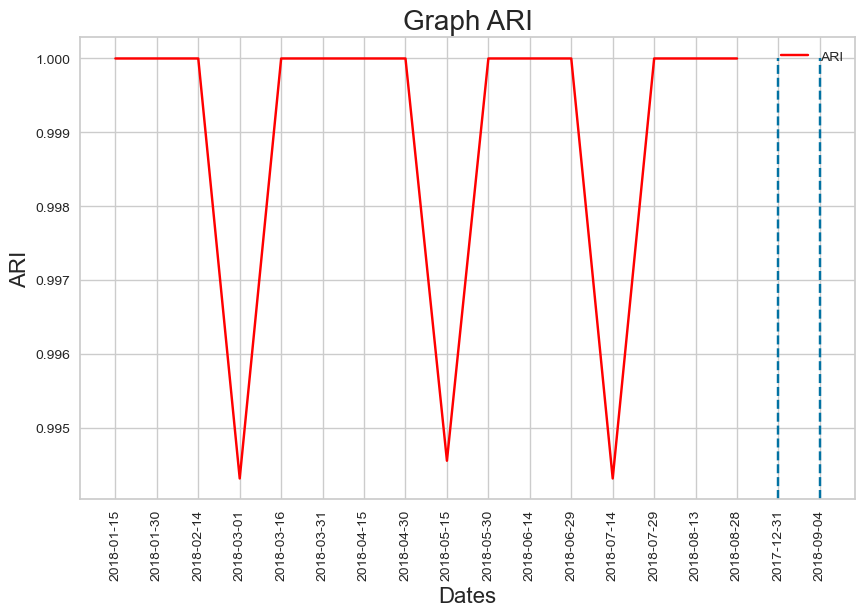

In [27]:
def plot_ARI(ARIscore, date):
    plt.figure(figsize=(10,6))
    plt.xlabel('Dates', size=16)
    plt.ylabel('ARI', size=16)
    plt.title('Graph ARI', size=20)
    
    initial_date = "2017-12-31"
    final_date = "2018-09-04"
    
    ax = sns.lineplot(x=dates, y=ARIscore, color='red', label='ARI')
    
    ylims = ax.get_ylim()
    
    st = ax.vlines(initial_date, ylims[0], ARIscore[0], linestyles='--')
    end = ax.vlines(final_date, ylims[0], ARIscore[-1], linestyles='--')
    
    ax.set_ylim(ylims)
    plt.grid(True)
    plt.xticks(rotation = 'vertical')
    plt.show()
    
plot_ARI(ARIscore, dates)